In [269]:
# importing OpenCV
import cv2 as cv
# importing Aruco Module
import cv2.aruco as aruco

import numpy as np

import pandas as pd

In [270]:
# reading the image uploaded into Google Colab folder
frame = cv.imread("/content/aruco_codes.png")

In [271]:
# creating a dictionary of aruco markers, using the predefined aruco.DICT_6X6_250 dictionary
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

In [272]:
# creating variables to contain corner points of detected markers,
# IDs of detected markers,
# and undetected markers
corners, ids, rejected = aruco.detectMarkers(frame, aruco_dict)

In [273]:
# creating a copy of the image
frame_copy = frame.copy()
# drawing the detected markers onto the image copy
frame_with_markers = aruco.drawDetectedMarkers(frame_copy, corners, ids)

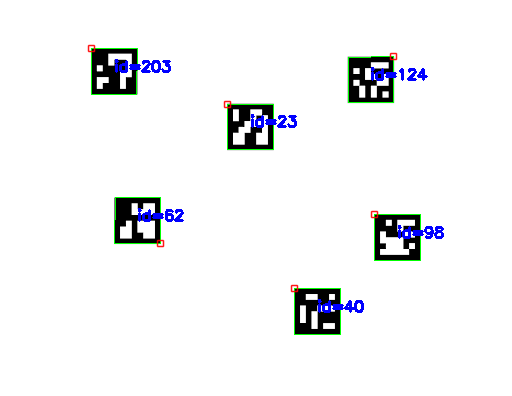

In [274]:
# importing cv2_imshow to see the image with markers in google colab
from google.colab.patches import cv2_imshow
cv2_imshow(frame_with_markers)

In [275]:
# In the arrays produced by detectMarkers,
# it appears that the aruco codes in the image are listed in order of bottom to top.
# So, to get the details of the top aruco code, I'll refer to the last entry in the arrays
print("The id of the top left Aruco code is " + str(ids[-1][0]))

The id of the top left Aruco code is 203


In [276]:
# Looking at the corners of the top left Aruco marker
print(corners[-1][0])
print(type(corners[-1][0]))

[[ 91.  48.]
 [137.  48.]
 [136.  94.]
 [ 91.  94.]]
<class 'numpy.ndarray'>


In [277]:
# Using the corners of the Aruco marker to find its area
area = cv.contourArea(corners[-1][0])
print("The area of the top left Aruco code is " + str(area))

The area of the top left Aruco code is 2093.0


In [278]:
areas_collection = []
for x in corners:
  areas_collection.append(cv.contourArea(x))
print(areas_collection)

[2116.0, 2116.0, 2093.0, 2070.0, 2047.5, 2093.0]


In [279]:
# Looking at the odd area and the corners, it seems that the Aruco marker is not fully rectangular

# Calculating the area of a rectangle enclosing an Aruco marker using OpenCV

# Uploading the array of the Aruco marker's corners to find the minimum area rectangle that encloses the Aruco marker
rect = cv.minAreaRect(corners[-1])
print(rect)
# Getting an array of the corners of the enclosing rectangle
box = cv.boxPoints(rect)
print(box)
# Finding the area of the rectangle
area2 = cv.contourArea(box)
print("The area of the smallest possible rectangle enclosing the top left Aruco code is " + str(area2))

((114.0, 71.0), (46.0, 46.0), 90.0)
[[ 91.  48.]
 [137.  48.]
 [137.  94.]
 [ 91.  94.]]
The area of the smallest possible rectangle enclosing the top left Aruco code is 2116.0


In the next part, turning the ids and corners arrays into a downloadable dataframe

In [282]:
# I could not make a dataframe using the corners variable containing arrays,
# so I will turn all of its arrays into lists
corners_list = []
for x in corners:
  corners_list.append(x[0].tolist())

corners_list

[[[294.0, 288.0], [340.0, 288.0], [340.0, 334.0], [294.0, 334.0]],
 [[374.0, 214.0], [420.0, 214.0], [420.0, 260.0], [374.0, 260.0]],
 [[160.0, 243.0], [114.0, 243.0], [115.0, 197.0], [160.0, 197.0]],
 [[227.0, 104.0], [273.0, 104.0], [273.0, 149.0], [227.0, 149.0]],
 [[393.0, 56.0], [393.0, 102.0], [348.0, 102.0], [348.0, 57.0]],
 [[91.0, 48.0], [137.0, 48.0], [136.0, 94.0], [91.0, 94.0]]]

In [283]:
# When the corners variable turns into a list of lists,
# the ids array does not work in the making of a dataframe.
# So I will also turn the ids array into a list
ids_list = []
for x in ids:
 ids_list.append(x[0])

ids_list

[40, 98, 62, 23, 124, 203]

In [284]:
# Turning the data into a dictionary
data = {'ID':ids_list, 'Corners':corners_list, 'Area':areas_collection}
data

{'ID': [40, 98, 62, 23, 124, 203],
 'Corners': [[[294.0, 288.0], [340.0, 288.0], [340.0, 334.0], [294.0, 334.0]],
  [[374.0, 214.0], [420.0, 214.0], [420.0, 260.0], [374.0, 260.0]],
  [[160.0, 243.0], [114.0, 243.0], [115.0, 197.0], [160.0, 197.0]],
  [[227.0, 104.0], [273.0, 104.0], [273.0, 149.0], [227.0, 149.0]],
  [[393.0, 56.0], [393.0, 102.0], [348.0, 102.0], [348.0, 57.0]],
  [[91.0, 48.0], [137.0, 48.0], [136.0, 94.0], [91.0, 94.0]]],
 'Area': [2116.0, 2116.0, 2093.0, 2070.0, 2047.5, 2093.0]}

In [285]:
aruco_dataframe = pd.DataFrame(data)
aruco_dataframe

,ID,Corners,Area
0,40,"[[294.0, 288.0], [340.0, 288.0], [340.0, 334.0...",2116.0
1,98,"[[374.0, 214.0], [420.0, 214.0], [420.0, 260.0...",2116.0
2,62,"[[160.0, 243.0], [114.0, 243.0], [115.0, 197.0...",2093.0
3,23,"[[227.0, 104.0], [273.0, 104.0], [273.0, 149.0...",2070.0
4,124,"[[393.0, 56.0], [393.0, 102.0], [348.0, 102.0]...",2047.5
5,203,"[[91.0, 48.0], [137.0, 48.0], [136.0, 94.0], [...",2093.0


In [ ]:
aruco_dataframe.to_csv('Aruco_Data.csv', index=False)